<a href="https://colab.research.google.com/github/DataMastersUN/FA_T3/blob/main/Trabajo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pickle
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import math
import os
from PIL import Image
from IPython.display import display

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#ancho, alto = imagen.size
#print(f"Tamaño de la imagen: {ancho}x{alto}")

# También puedes acceder a los píxeles de la imagen
#pixeles = list(imagen.getdata())
#print(f"Primer píxel: {pixeles[0]}")

# Cierra la imagen
#imagen.close()

In [ ]:
#CODIGO INICIAL PARA AÑADIR TODAS LAS IMAGENES A UN LISTA ESTÁTICA, Y ASÍ NO TENER QUE CARGAR TODAS LAS IMÁGENES CADA VEZ QUE SE EJECUTE EL CÓDGO
"""
# Ruta a la carpeta raíz que contiene las subcarpetas con las imágenes PGM
ruta_raiz = '/content/drive/Shareddrives/FdeAnaliticaG4/Proyecto3/faces_4'
rutas_imagenes = []
# Recorre las subcarpetas y busca las imágenes PGM
for directorio_raiz, directorios, archivos in os.walk(ruta_raiz):
    for archivo in archivos:
        if archivo.lower().endswith('.pgm'):
            # Construye la ruta completa al archivo
            ruta_completa = os.path.join(directorio_raiz, archivo)
            rutas_imagenes.append(ruta_completa)
# Ahora tienes todas las rutas de las imágenes PGM en la lista rutas_imagenes
# Puedes cargar las imágenes si es necesario
imagenes = [cv2.imread(ruta) for ruta in rutas_imagenes]

# Para verificar la cantidad de imágenes
print(f'Se encontraron {len(imagenes)} imágenes PGM.')

# Para acceder a una imagen específica
imagen_1 = imagenes[0]"""

Se encontraron 624 imágenes PGM.


In [ ]:
# Ruta en tu Google Drive donde guardar el archivo
"""ruta_archivo = '/content/drive/Shareddrives/FdeAnaliticaG4/Proyecto3/imagenes.pkl'
with open(ruta_archivo, 'wb') as archivo:
    pickle.dump(imagenes, archivo)"""

In [4]:
ruta_archivo = '/content/drive/Shareddrives/FdeAnaliticaG4/Proyecto3/imagenes.pkl'

with open(ruta_archivo, 'rb') as archivo:
    images = pickle.load(archivo)
print(f'Se encontraron {len(images)} imágenes PGM.')

Se encontraron 624 imágenes PGM.


In [11]:
images[45].shape

(30, 32, 3)

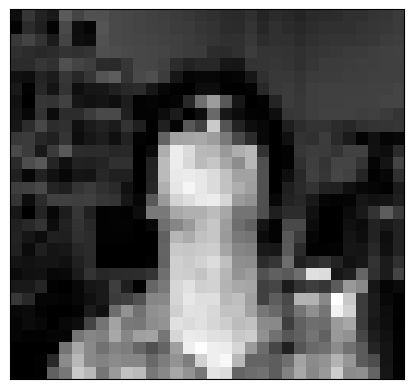

In [16]:
imagen = Image.open('/content/drive/Shareddrives/FdeAnaliticaG4/Proyecto3/faces_4/an2i/an2i_up_sad_sunglasses_4.pgm')

plt.imshow(imagen, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

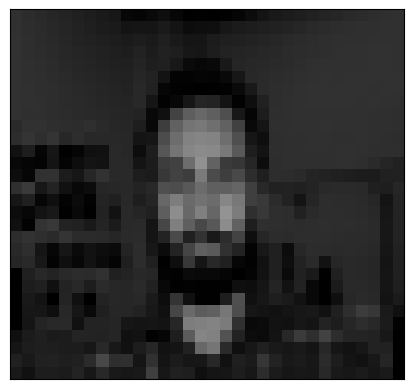

In [23]:
plt.imshow(images[134], cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [24]:
images[7].shape

(30, 32, 3)

In [27]:
imagen_prueba = cv2.cvtColor(images[134], cv2.COLOR_BGR2GRAY)
imagen_prueba.shape

(30, 32)

In [29]:
imagen_prueba

array([[ 48,  44,  41,  38,  35,  32,  29,  26,  23,   7,   5,   9,  14,
          6,   0,   1,   0,   1,   5,  12,  20,  25,  28,  30,  33,  36,
         38,  41,  43,  45,  47,  48],
       [ 48,  45,  43,  40,  37,  34,  31,  28,  26,  20,  21,  21,  26,
         20,  12,  14,  15,  23,  27,  29,  31,  33,  35,  38,  41,  43,
         45,  46,  47,  47,  48,  48],
       [ 49,  46,  43,  41,  38,  35,  33,  31,  29,  26,  29,  26,  31,
         25,  21,  21,  28,  31,  32,  34,  36,  38,  41,  43,  44,  46,
         47,  47,  47,  48,  48,  48],
       [ 49,  46,  44,  42,  39,  37,  35,  33,  31,  29,  34,  28,  33,
         30,  23,  22,  29,  34,  36,  37,  39,  40,  43,  44,  45,  46,
         47,  48,  48,  49,  49,  48],
       [ 49,  47,  45,  43,  40,  38,  36,  34,  32,  31,  36,  30,  32,
         24,  10,   7,   9,  25,  37,  39,  40,  42,  43,  45,  47,  48,
         48,  48,  48,  49,  49,  48],
       [ 49,  47,  46,  44,  42,  39,  38,  36,  34,  33,  38,  34,  19,
  

Representación de una matriz que describe los valores de los píxeles en una imagen en blanco y negro. Cada número en la matriz corresponde al valor del píxel en esa posición en la imagen.

Los números en la matriz representan los niveles de gris de cada píxel en la imagen en blanco y negro.
Los valores suelen estar en el rango de 0 a 255, donde 0 representa negro y 255 representa blanco, y los valores intermedios representan tonos de gris.
La matriz se forma de tal manera que cada fila y columna representa un píxel en la imagen. Por ejemplo, el valor en la posición (0, 0) de la matriz representa el nivel de gris del píxel en la esquina superior izquierda de la imagen, y el valor en la posición (30, 32) representa el píxel en la esquina inferior derecha de la imagen.
Esta matriz se utiliza para almacenar la información de intensidad de los píxeles en la imagen en blanco y negro. Puedes procesar y analizar esta matriz para realizar diversas operaciones en la imagen.

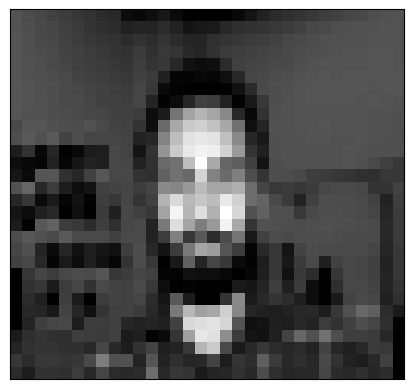

In [28]:
plt.imshow(imagen_prueba, cmap = 'gray')
plt.xticks([])
plt.yticks([])
plt.show()

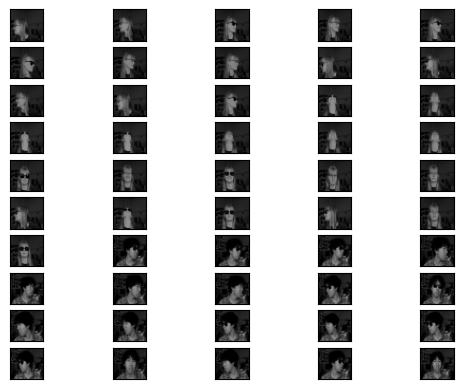

In [19]:
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.imshow(images[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
# Convirtamos las imágenes en vectores y luego construimos una matriz
# con estos vectores como filas
img_vectorizadas = [i.flatten() for i in images]
imagenes_matriz = np.vstack(img_vectorizadas)
imagenes_matriz = imagenes_matriz-imagenes_matriz.mean()
print(imagenes_matriz.shape)

(624, 2880)


Esta función

In [ ]:
# Calculemos la matriz de correlación:
S = np.corrcoef(imagenes_matriz.T)
print(S.shape)

(2880, 2880)


In [21]:
for i in range(2):
    tipo = type(images[i])
    print(f"Elemento: {images[i]}, Tipo: {tipo}\n\n")

Elemento: [[[39 39 39]
  [38 38 38]
  [36 36 36]
  ...
  [36 36 36]
  [36 36 36]
  [37 37 37]]

 [[39 39 39]
  [37 37 37]
  [36 36 36]
  ...
  [36 36 36]
  [37 37 37]
  [37 37 37]]

 [[39 39 39]
  [38 38 38]
  [37 37 37]
  ...
  [37 37 37]
  [37 37 37]
  [38 38 38]]

 ...

 [[28 28 28]
  [30 30 30]
  [29 29 29]
  ...
  [42 42 42]
  [43 43 43]
  [43 43 43]]

 [[ 5  5  5]
  [20 20 20]
  [27 27 27]
  ...
  [32 32 32]
  [41 41 41]
  [41 41 41]]

 [[17 17 17]
  [20 20 20]
  [31 31 31]
  ...
  [11 11 11]
  [37 37 37]
  [40 40 40]]], Tipo: <class 'numpy.ndarray'>


Elemento: [[[35 35 35]
  [34 34 34]
  [32 32 32]
  ...
  [33 33 33]
  [33 33 33]
  [33 33 33]]

 [[36 36 36]
  [34 34 34]
  [33 33 33]
  ...
  [33 33 33]
  [34 34 34]
  [35 35 35]]

 [[37 37 37]
  [35 35 35]
  [34 34 34]
  ...
  [35 35 35]
  [35 35 35]
  [35 35 35]]

 ...

 [[16 16 16]
  [22 22 22]
  [25 25 25]
  ...
  [39 39 39]
  [40 40 40]
  [39 39 39]]

 [[ 3  3  3]
  [15 15 15]
  [23 23 23]
  ...
  [30 30 30]
  [38 38 38]
  [3